In [ ]:
# 이미지 출력 시 한글 깨짐에 대한 방지를 위한 코드01
# 아래 세개줄 먼저 런타임 돌리고 끊은 후 아래 plt.rc 코드 다시 돌리기 과정 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/. cache/matplotlib -rf

In [ ]:
# 필요 패키지 설치
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # 의사결정트리(회귀)
from sklearn.preprocessing import MinMaxScaler # 최소최대스케일러
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # 데이터셋분리, 교차검증에 대한 성능평가
import matplotlib.pyplot as plt #그래프 출력

In [ ]:
# 이미지 출력 시 한글 깨짐에 대한 방지를 위한 코드02
plt.rc('font',family='NanumBarunGothic')

In [ ]:
df_seed1 = pd.read_csv('seedSet1.csv',encoding='cp949')
df_seriesA = pd.read_csv('seriesASet1.csv',encoding='cp949')
df_seriesB = pd.read_csv('seriesBSet1.csv',encoding='cp949')
df_seriesC = pd.read_csv('seriesCset1.csv',encoding='cp949')
df_IPOmna = pd.read_csv('IPOmnaSet1.csv',encoding='cp949')
# print(len(df_seed1)+len(df_seriesA)+len(df_seriesB)+len(df_seriesC)+len(df_IPOmna)) #901

In [ ]:
df_seed1.info() # 변수 df_seed1에 넣어둔 데이터셋 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   고용인원             169 non-null    int64  
 1   투자유치횟수           169 non-null    int64  
 2   서비스/제품 수         169 non-null    int64  
 3   연간 퇴사율           169 non-null    int64  
 4   공동 창업자 수         169 non-null    int64  
 5   총 투자자 수          169 non-null    int64  
 6   특허기술 평균등급        169 non-null    float64
 7   최종투자단계           169 non-null    object 
 8   투자점수             169 non-null    int64  
 9   자본금(만원)          169 non-null    int64  
 10  누적투자유치금액(만원)     169 non-null    int64  
 11  연매출(만원)          169 non-null    int64  
 12  매출액_2020(만원)     169 non-null    int64  
 13  매출액_2021(만원)     169 non-null    int64  
 14  영업이익_2020(만원)    169 non-null    int64  
 15  영업이익_2021(만원)    169 non-null    int64  
 16  순이익_2020(만원)     169 non-null    int64  
 17  순이익_2021(만원)    

In [ ]:
X = df_seed1.drop(['연매출(만원)','최종투자단계'],axis=1) # 피처 연매출, 최종투자단계를 제외한 열들을 설명변수 X 데이터셋으로 담음
y = df_seed1['연매출(만원)'] # 피처 연매출을 종속변수 y 데이터셋으로 담음

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   고용인원             169 non-null    int64  
 1   투자유치횟수           169 non-null    int64  
 2   서비스/제품 수         169 non-null    int64  
 3   연간 퇴사율           169 non-null    int64  
 4   공동 창업자 수         169 non-null    int64  
 5   총 투자자 수          169 non-null    int64  
 6   특허기술 평균등급        169 non-null    float64
 7   투자점수             169 non-null    int64  
 8   자본금(만원)          169 non-null    int64  
 9   누적투자유치금액(만원)     169 non-null    int64  
 10  매출액_2020(만원)     169 non-null    int64  
 11  매출액_2021(만원)     169 non-null    int64  
 12  영업이익_2020(만원)    169 non-null    int64  
 13  영업이익_2021(만원)    169 non-null    int64  
 14  순이익_2020(만원)     169 non-null    int64  
 15  순이익_2021(만원)     169 non-null    int64  
 16  자산_2020(만원)      169 non-null    int64  
 17  자산_2021(만원)     

In [ ]:
# sklearn.model_selection의 train_test_split을 이용해서
# 데이터셋을 훈련용(train_x,train_y),테스트용(test_x,test_y)으로 나눔.
#random_state=42(해당 파라메터의 값이 None만 아니면, 셔플링 고정적으로 하는 효과 낼 수 있음. 상세설명은 gpt에게 하기)는 데이터셋을 나눌 때 shuffling을 고정적으로 진행하는 효과
#test_size=0.3은 데이터 인스턴스 전체 갯수를 100%로 보고 30%를 테스트용 데이터셋으로 할당한다는 말임.
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 42, test_size = 0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((118, 25), (51, 25), (118,), (51,))

In [ ]:
## initiating DecisionTreeRegressor method
# 의사결정트리 회귀용 모델을 생성함.
m_seed = DecisionTreeRegressor(random_state = 1004)

## fitting a decision tree classifier
# 생성한 모델에 훈련데이터셋으로 학습(fit)시킴.
m_seed_model = m_seed.fit(train_x, train_y)


## feature importances
# 변수의 중요도를 수치로 도출함
m_seed_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
## Text Representation
# 훈련시킨 모델을 tree.export_text의 인자로 주어 , 글자로써 트리가지를 출력함
m_seed_model_text = tree.export_text(m_seed_model)

print(m_seed_model_text)

|--- feature_11 <= 986500.00
|   |--- feature_11 <= 244000.00
|   |   |--- feature_15 <= 240000.00
|   |   |   |--- feature_11 <= 115000.00
|   |   |   |   |--- feature_11 <= 25500.00
|   |   |   |   |   |--- value: [20716.12]
|   |   |   |   |--- feature_11 >  25500.00
|   |   |   |   |   |--- value: [84048.78]
|   |   |   |--- feature_11 >  115000.00
|   |   |   |   |--- feature_11 <= 158000.00
|   |   |   |   |   |--- value: [144500.00]
|   |   |   |   |--- feature_11 >  158000.00
|   |   |   |   |   |--- value: [226071.43]
|   |   |--- feature_15 >  240000.00
|   |   |   |--- value: [1503000.00]
|   |--- feature_11 >  244000.00
|   |   |--- feature_15 <= 100500.00
|   |   |   |--- feature_3 <= 30.00
|   |   |   |   |--- feature_8 <= 43709.00
|   |   |   |   |   |--- value: [772000.00]
|   |   |   |   |--- feature_8 >  43709.00
|   |   |   |   |   |--- value: [921000.00]
|   |   |   |--- feature_3 >  30.00
|   |   |   |   |--- feature_17 <= 520500.00
|   |   |   |   |   |--- value: 

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   고용인원             169 non-null    int64  
 1   투자유치횟수           169 non-null    int64  
 2   서비스/제품 수         169 non-null    int64  
 3   연간 퇴사율           169 non-null    int64  
 4   공동 창업자 수         169 non-null    int64  
 5   총 투자자 수          169 non-null    int64  
 6   특허기술 평균등급        169 non-null    float64
 7   투자점수             169 non-null    int64  
 8   자본금(만원)          169 non-null    int64  
 9   누적투자유치금액(만원)     169 non-null    int64  
 10  매출액_2020(만원)     169 non-null    int64  
 11  매출액_2021(만원)     169 non-null    int64  
 12  영업이익_2020(만원)    169 non-null    int64  
 13  영업이익_2021(만원)    169 non-null    int64  
 14  순이익_2020(만원)     169 non-null    int64  
 15  순이익_2021(만원)     169 non-null    int64  
 16  자산_2020(만원)      169 non-null    int64  
 17  자산_2021(만원)     

In [ ]:
col=['고용인원','투자유치횟수','서비스/제품 수','연간 퇴사율','공동 창업자 수','총 투자자 수','특허기술 평균등급','투자점수','자본금(만원)','누적투자유치금액(만원)','매출액_2020(만원)','매출액_2021(만원)','영업이익_2020(만원)','영업이익_2021(만원)','순이익_2020(만원)','순이익_2021(만원)','자산_2020(만원)','자산_2021(만원)','자본_2020(만원)','자본_2021(만원)','2022기준 시장규모(만원)','최근투자유치(만원)','년차','자본잠식률','주소 점수']

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/e

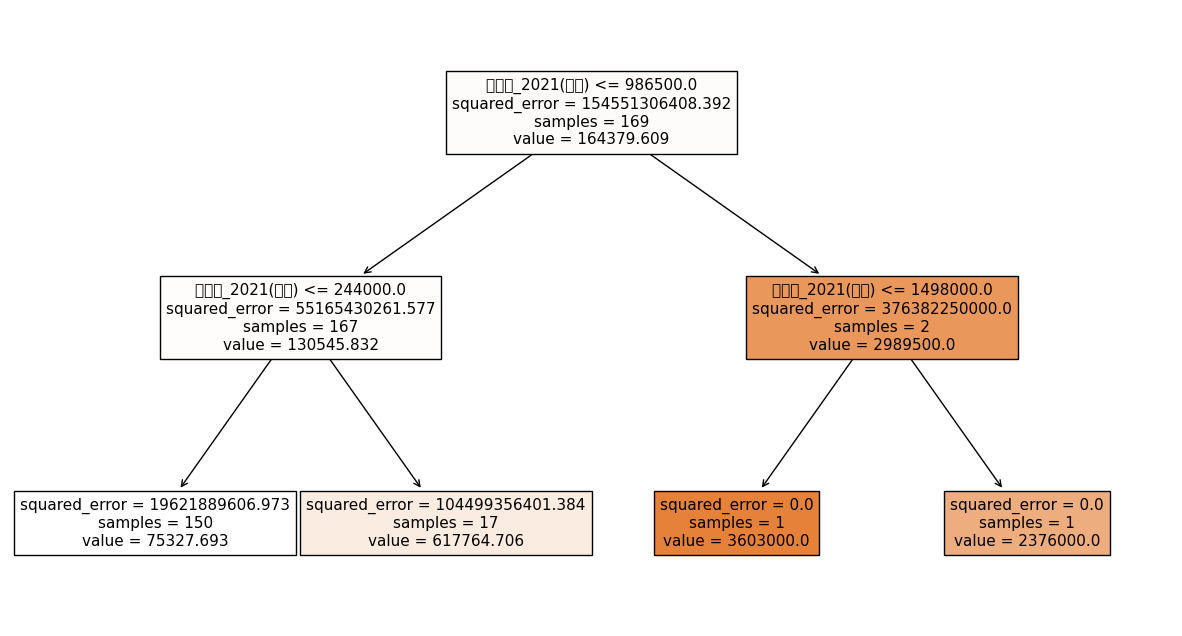

In [ ]:
## Plot Tree with plot_tree
fig = plt.figure(figsize=(15,8)) # 의사결정트리 추출결과를 그림으로 나타내기 위해 도화지를 생성. 사이즈는 15*8로.
a = tree.plot_tree(m_seed_model, feature_names=col, filled=True)

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    m_seed_model,
    feature_names=col,
    class_names=['0', '1'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

ValueError: ignored

seriesA

In [ ]:
X = df_seriesA.drop(['연매출(만원)','최종투자단계'],axis=1)
y = df_seriesA['연매출(만원)']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 42, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

## initiating DecisionTreeClassifer method
# dt_clf = DecisionTreeClassifier(random_state = 1004)
m_seed = DecisionTreeRegressor(random_state = 1004)

## fitting a decision tree classifier
m_seed_model = m_seed.fit(X, y)


## feature importances
# dt_clf_model.feature_importances_
print(m_seed_model.feature_importances_)

## Text Representation
m_seed_model_text = tree.export_text(m_seed_model)

print(m_seed_model_text)

(140, 25) (60, 25) (140,) (60,)
[0.04027183 0.02013592 0.0251699  0.03113325 0.00503398 0.02181391
 0.02953268 0.05033979 0.0251699  0.0251699  0.03188187 0.21404675
 0.05201779 0.03020388 0.03020388 0.04027183 0.05429506 0.05684677
 0.0251699  0.02013592 0.0251699  0.0251699  0.05033979 0.03020388
 0.04027183]
|--- feature_17 <= 23500.00
|   |--- feature_15 <= 21000.00
|   |   |--- class: 37000
|   |--- feature_15 >  21000.00
|   |   |--- feature_11 <= 8955.50
|   |   |   |--- class: 5911
|   |   |--- feature_11 >  8955.50
|   |   |   |--- feature_7 <= 88.50
|   |   |   |   |--- class: 83000
|   |   |   |--- feature_7 >  88.50
|   |   |   |   |--- class: 12000
|--- feature_17 >  23500.00
|   |--- feature_11 <= 19000.00
|   |   |--- feature_11 <= 17500.00
|   |   |   |--- feature_11 <= 16000.00
|   |   |   |   |--- feature_11 <= 14500.00
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 18.00
|   |   |   |   |   |   |   |--- class: 1800
|   |   |   | 

seriesB

In [ ]:
X = df_seriesB.drop(['연매출(만원)','최종투자단계'],axis=1)
y = df_seriesB['연매출(만원)']


train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 42, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

## initiating DecisionTreeClassifer method
# dt_clf = DecisionTreeClassifier(random_state = 1004)
m_seed = DecisionTreeRegressor(random_state = 1004)

## fitting a decision tree classifier
m_seed_model = m_seed.fit(X, y)


## feature importances
# dt_clf_model.feature_importances_
print(m_seed_model.feature_importances_)

## Text Representation
m_seed_model_text = tree.export_text(m_seed_model)

print(m_seed_model_text)

(135, 25) (59, 25) (135,) (59,)
[0.0471582  0.02592335 0.02592335 0.03802092 0.02073868 0.03110802
 0.04147736 0.04283525 0.07164272 0.03629269 0.03748603 0.05694525
 0.06911623 0.02073868 0.03110802 0.04147736 0.04147736 0.06048782
 0.03110802 0.02073868 0.03629269 0.04666203 0.03858637 0.0518467
 0.03480816]
|--- feature_11 <= 158.00
|   |--- class: 0
|--- feature_11 >  158.00
|   |--- feature_10 <= 31000.00
|   |   |--- feature_12 <= 374000.00
|   |   |   |--- feature_24 <= 5.50
|   |   |   |   |--- feature_22 <= 7.50
|   |   |   |   |   |--- feature_11 <= 50500.00
|   |   |   |   |   |   |--- feature_24 <= 4.50
|   |   |   |   |   |   |   |--- class: 106000
|   |   |   |   |   |   |--- feature_24 >  4.50
|   |   |   |   |   |   |   |--- class: 3000
|   |   |   |   |   |--- feature_11 >  50500.00
|   |   |   |   |   |   |--- class: 53000
|   |   |   |   |--- feature_22 >  7.50
|   |   |   |   |   |--- class: 44000
|   |   |   |--- feature_24 >  5.50
|   |   |   |   |--- feature_23 <

C

In [ ]:
X = df_seriesC.drop(['연매출(만원)','최종투자단계'],axis=1)
y = df_seriesC['연매출(만원)']


train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 42, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

## initiating DecisionTreeClassifer method
# dt_clf = DecisionTreeClassifier(random_state = 1004)
m_seed = DecisionTreeRegressor(random_state = 1004)

## fitting a decision tree classifier
m_seed_model = m_seed.fit(X, y)


## feature importances
# dt_clf_model.feature_importances_
print(m_seed_model.feature_importances_)

## Text Representation
m_seed_model_text = tree.export_text(m_seed_model)

print(m_seed_model_text)

(135, 25) (58, 25) (135,) (58,)
[0.02084458 0.03647802 0.03387245 0.03387245 0.02084458 0.0642708
 0.02791685 0.03126688 0.0677449  0.04876144 0.04388116 0.08505363
 0.02605573 0.01042229 0.02605573 0.05211146 0.01645239 0.04168917
 0.05211146 0.04168917 0.03647802 0.03126688 0.04168917 0.06748164
 0.04168917]
|--- feature_11 <= 109.50
|   |--- class: 0
|--- feature_11 >  109.50
|   |--- feature_16 <= 135000000.00
|   |   |--- feature_11 <= 57000.00
|   |   |   |--- feature_11 <= 54500.00
|   |   |   |   |--- feature_10 <= 50500.00
|   |   |   |   |   |--- feature_9 <= 3735000.00
|   |   |   |   |   |   |--- feature_24 <= 3.50
|   |   |   |   |   |   |   |--- class: 46000
|   |   |   |   |   |   |--- feature_24 >  3.50
|   |   |   |   |   |   |   |--- feature_23 <= -4557.76
|   |   |   |   |   |   |   |   |--- class: 1362
|   |   |   |   |   |   |   |--- feature_23 >  -4557.76
|   |   |   |   |   |   |   |   |--- feature_8 <= 52500.00
|   |   |   |   |   |   |   |   |   |--- class: 180

df_IPOmna

In [ ]:
X = df_IPOmna.drop(['연매출(만원)','최종투자단계'],axis=1)
y = df_IPOmna['연매출(만원)']


train_x, test_x, train_y, test_y = train_test_split(X, y, random_state= 42, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

## initiating DecisionTreeClassifer method
# dt_clf = DecisionTreeClassifier(random_state = 1004)
m_seed = DecisionTreeRegressor(random_state = 1004)

## fitting a decision tree classifier
m_seed_model = m_seed.fit(X, y)


## feature importances
# dt_clf_model.feature_importances_
print(m_seed_model.feature_importances_)

## Text Representation
m_seed_model_text = tree.export_text(m_seed_model)

print(m_seed_model_text)

(101, 25) (44, 25) (101,) (44,)
[0.03474219 0.05442943 0.02084531 0.06422041 0.02084531 0.04863906
 0.04863906 0.0555875  0.03696738 0.03722377 0.02084531 0.05531239
 0.00694844 0.05327136 0.03564263 0.04863906 0.02084531 0.0555875
 0.04863906 0.0555875  0.01389688 0.02779375 0.01621302 0.06305084
 0.0555875 ]
|--- feature_11 <= 31.00
|   |--- feature_23 <= -19.19
|   |   |--- class: 0
|   |--- feature_23 >  -19.19
|   |   |--- feature_24 <= 7.50
|   |   |   |--- class: 644000
|   |   |--- feature_24 >  7.50
|   |   |   |--- feature_3 <= 46.50
|   |   |   |   |--- class: 274000
|   |   |   |--- feature_3 >  46.50
|   |   |   |   |--- class: 200
|--- feature_11 >  31.00
|   |--- feature_8 <= 1111.00
|   |   |--- feature_13 <= 28904.00
|   |   |   |--- class: 62000
|   |   |--- feature_13 >  28904.00
|   |   |   |--- feature_24 <= 7.50
|   |   |   |   |--- class: 762000
|   |   |   |--- feature_24 >  7.50
|   |   |   |   |--- feature_3 <= 14.00
|   |   |   |   |   |--- class: 8623
|   | 